In [1]:
import pyaudio
import struct
import numpy
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.spatial import Voronoi, voronoi_plot_2d
import wave

CHUNK = 1024 * 12 #Samples per frame

In [129]:
stream = wave.open('c-blues-scale.wav', mode='rb')

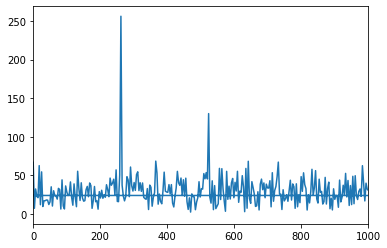

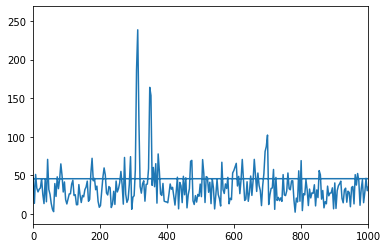

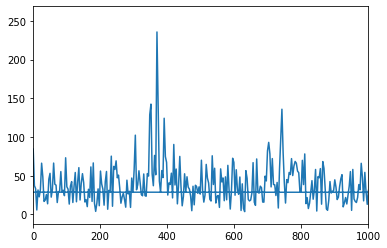

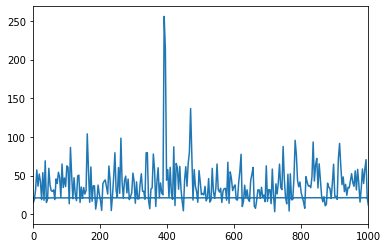

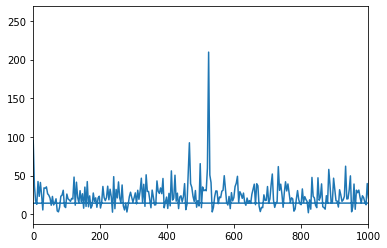

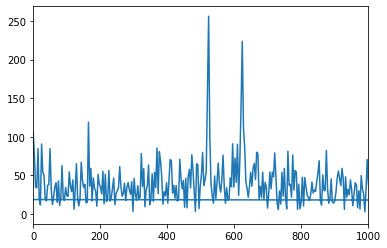

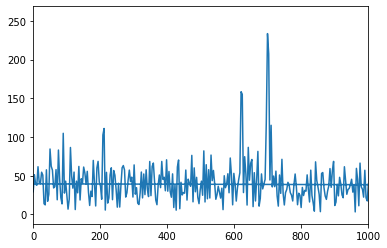

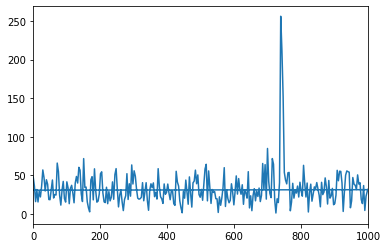

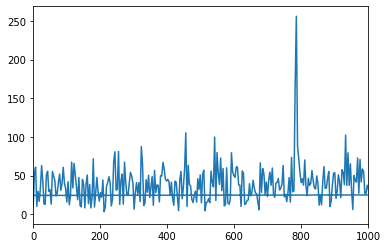

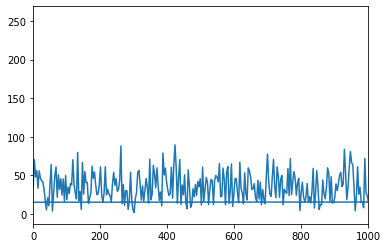

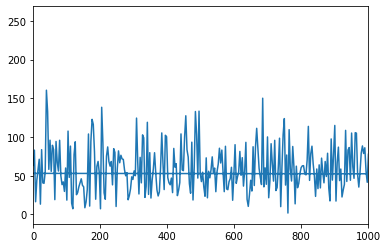

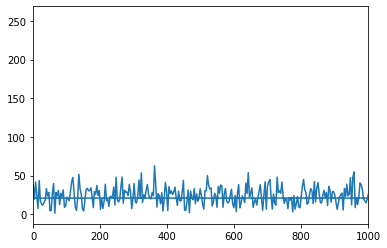

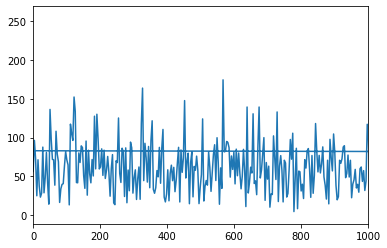

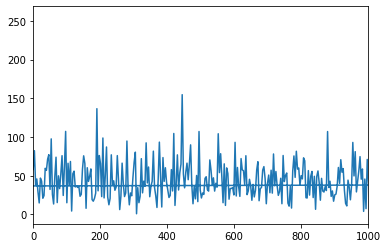

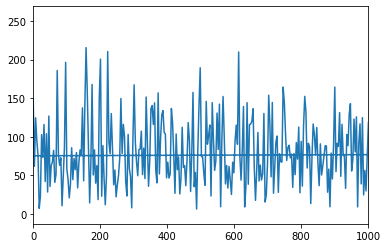

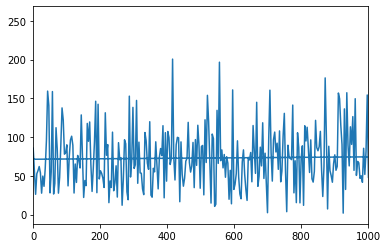

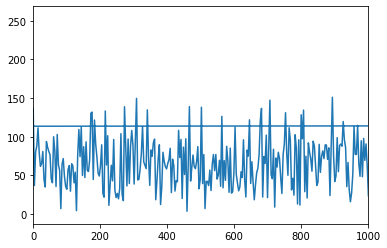

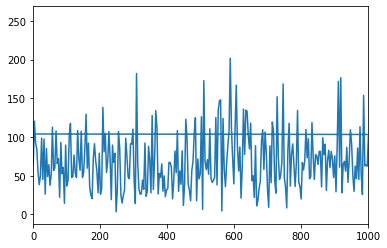

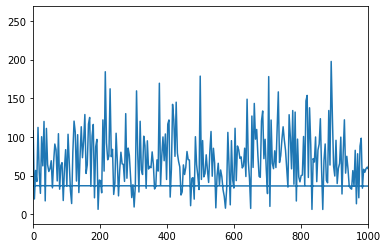

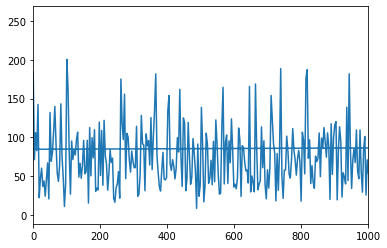

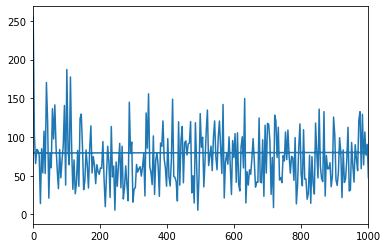

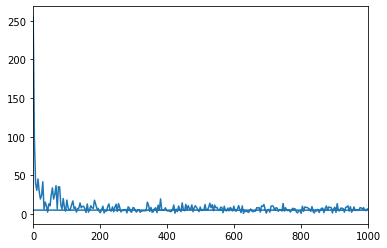

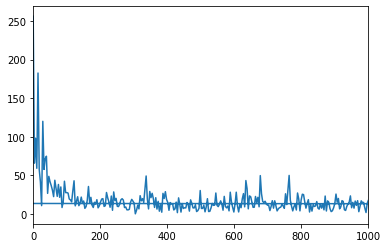

In [130]:
while stream.tell() != stream.getnframes():
    rawData = stream.readframes(CHUNK)
    data = numpy.frombuffer(rawData, numpy.int16)
    transformed = fftpack.fft(data)

    trimmedData = abs(transformed[0:CHUNK])
    x = fftpack.fftfreq(CHUNK, 1/stream.getframerate())
    y = (trimmedData / max(trimmedData) * 256)

    if x.shape[0] == y.shape[0]:
        plt.plot(x, y)
        plt.xlim(0, 1000)
        plt.show()

In [16]:
import random
def random_color(as_str=True, alpha=0.5):
    rgb = [random.randint(0,255),
           random.randint(0,255),
           random.randint(0,255)]
    if as_str:
        return "rgba"+str(tuple(rgb+[alpha]))
    else:
        return list(numpy.array(rgb)/255) + [alpha]

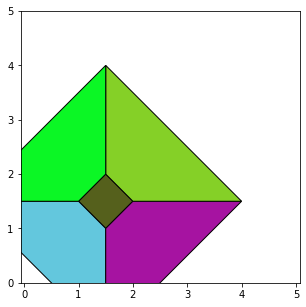

In [21]:
from voronoi_polygons import voronoi_finite_polygons_2d
from matplotlib.patches import Polygon

vor = Voronoi([(1.5,1.5), (1,1), (2,1), (2,2), (1,2)])

regions, vertices = voronoi_finite_polygons_2d(vor)

polygons = []
for reg in regions:
    polygon = vertices[reg]
    polygons.append(polygon)

plt.figure(figsize=(5,5))
ax = plt.subplot()

plt.axis("equal")

ax.set_xlim(0,5)
ax.set_ylim(0,5)

for poly in polygons:
        colored_cell = Polygon(poly,
                               facecolor=random_color(as_str=False, alpha=1),
                               edgecolor="black")
        ax.add_patch(colored_cell)

plt.show()